# PROBLEM 1
## Topic Models

Obtain Topic Models (K=10, 20, 50) for both datasets by running LDA and NMF methods; you can call libraries for both methods and dont have to use the ES index as source. For both LDA and NMF: print out for each topic the top 20 words (with probabilities)

The rest of of topic exercises and results are required only for the LDA topics:
- 20NG: how well the topics align with the 20NG label classes? This is not asking for a measurement, but rather for a visual inspection to determine what topics match well with what classes. Does this change if one increases the topics from 20 to 50?

In [64]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import heapq
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm

In [2]:
def load_20ng():
    X_train, y_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    X_test, y_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    
    return X_train, y_train, X_test, y_test

In [3]:
# Function to preprocess DUC2001 data
def preprocess_duc2001(file_path):
    with open(file_path, "r", encoding="ISO-8859-1") as f:
        content = f.read()

    # Extract abstracts
    abstracts = re.findall(r"Abstract:\n(.*?)\nIntroduction:", content, re.DOTALL)

    # Remove abstracts and tags from the content
    cleaned_content = re.sub(r"Abstract:.*?Introduction:", "", content, flags=re.DOTALL)
    
    return abstracts, cleaned_content.strip()

# Function to Load DUC2001 data
def load_duc2001(folder_path):
    abstracts = []
    contents = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        file_abstracts, file_content = preprocess_duc2001(file_path)
        abstracts.append(file_abstracts)
        contents.append(file_content)

    return abstracts, contents

In [4]:
path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 5A/DUC2001/Summaries/"
duc_abstracts, duc_contents = load_duc2001(path)

In [5]:
X_train, y_train, X_test, y_test = load_20ng()

news_df = pd.DataFrame({'News': X_train,
                       'Target': y_train})

In [6]:
df = pd.DataFrame({'abstracts': duc_abstracts, 'contents': duc_contents})
df['abstracts'] = df['abstracts'].astype(str)
df['contents'] = df['contents'].astype(str)

In [7]:
df.head()

abstracts  \
0  ['Some 40 members of Congress have joined with...   
1  ['Multitudes of native peoples, tourists and s...   
2  ['Population experts say that little would cha...   
3  ["The unofficial tornado season runs from Apri...   
4  ['William Gray, a hurricane expert, predicts m...   

                                            contents  
0  A coalition of members of Congress announced\n...  
1  Thousands of peole\nprayed, cheered, danced, b...  
2  If the two sides trying to force changes in\nt...  
3  Rumbling spring thunderstorms have announced t...  
4  A hurricane expert predicts a turbulent summer...

In [8]:
news_df.shape

(11314, 2)

In [9]:
news_df.head()

News  Target
0  I was wondering if anyone out there could enli...       7
1  A fair number of brave souls who upgraded thei...       4
2  well folks, my mac plus finally gave up the gh...       4
3  \nDo you have Weitek's address/phone number?  ...       1
4  From article <C5owCB.n3p@world.std.com>, by to...      14

In [10]:
def clean(sentence, lemmatize = True):
    # remove non alphabetic sequences
    pattern = re.compile(r'[^a-z]+')
    sentence = sentence.lower()
    sentence = pattern.sub(' ', sentence).strip()
    
    # Tokenize
    word_list = word_tokenize(sentence)
    
    # stop words
    stopwords_list = set(stopwords.words('english'))
    
    # remove stop words
    word_list = [word for word in word_list if word not in stopwords_list]

    # lemmatize
    lemma = WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    # list to sentence
    sentence = ' '.join(word_list)
    
    return sentence

In [11]:
tqdm.pandas()

news_df['News'] = news_df['News'].progress_apply(lambda x: clean(str(x)))

  0%|          | 0/11314 [00:00<?, ?it/s]

In [12]:
news_df.head()

News  Target
0  wondering anyone could enlighten car saw day d...       7
1  fair number brave soul upgraded si clock oscil...       4
2  well folk mac plus finally gave ghost weekend ...       4
3  weitek address phone number like get informati...       1
4  article c owcb n p world std com tombaker worl...      14

In [13]:
df['contents'] = df['contents'].progress_apply(lambda x: clean(str(x)))

  0%|          | 0/304 [00:00<?, ?it/s]

In [14]:
df.head()

abstracts  \
0  ['Some 40 members of Congress have joined with...   
1  ['Multitudes of native peoples, tourists and s...   
2  ['Population experts say that little would cha...   
3  ["The unofficial tornado season runs from Apri...   
4  ['William Gray, a hurricane expert, predicts m...   

                                            contents  
0  coalition member congress announced wednesday ...  
1  thousand peole prayed cheered danced beat drum...  
2  two side trying force change census get way re...  
3  rumbling spring thunderstorm announced beginni...  
4  hurricane expert predicts turbulent summer atl...

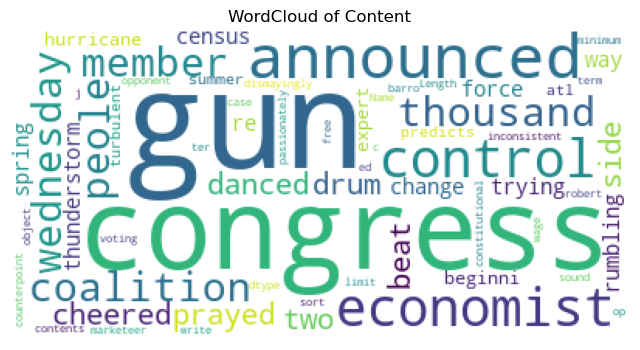

In [15]:
wordcloud = WordCloud(background_color='white',
                      max_words=200).generate(str(df['contents']))
fig = plt.figure(figsize=[8,8])
plt.title('WordCloud of Content')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

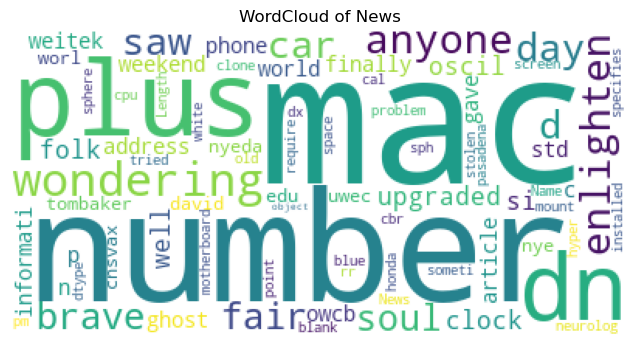

In [16]:
wordcloud = WordCloud(background_color='white',
                      max_words=200).generate(str(news_df['News']))
fig = plt.figure(figsize=[8,8])
plt.title('WordCloud of News')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [17]:
news_df

News  Target
0      wondering anyone could enlighten car saw day d...       7
1      fair number brave soul upgraded si clock oscil...       4
2      well folk mac plus finally gave ghost weekend ...       4
3      weitek address phone number like get informati...       1
4      article c owcb n p world std com tombaker worl...      14
...                                                  ...     ...
11309  dn nyeda cnsvax uwec edu david nye dn neurolog...      13
11310  old mac k mac plus problem screen blank someti...       4
11311  installed dx cpu clone motherboard tried mount...       3
11312  require hyper sphere space point specifies sph...       1
11313  stolen pasadena pm blue white honda cbr rr cal...       8

[11314 rows x 2 columns]

In [18]:
# function to map words to topics
def map_word2topic(components, terms, n_components):
    # create output series
    word2topics = pd.Series()
    
    for idx, component in enumerate(components):
        # map terms (words) with topic
        # which is probability of word given a topic P(w|t)
        term_topic = pd.Series(component, index=terms)
        # sort values based on probability
        term_topic.sort_values(ascending=False, inplace=True)
        # put result in series output
        word2topics['topic '+str(idx)] = list(term_topic.iloc[:n_components].index)
        
    return word2topics

## Topic Models

In [19]:
tfid_vec = TfidfVectorizer(tokenizer=lambda x: str(x).split())
news_X = tfid_vec.fit_transform(news_df['News'])
news_X.shape
news_terms = tfid_vec.get_feature_names_out()

C:\Users\chase\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### 10 Component LDA: 20ng

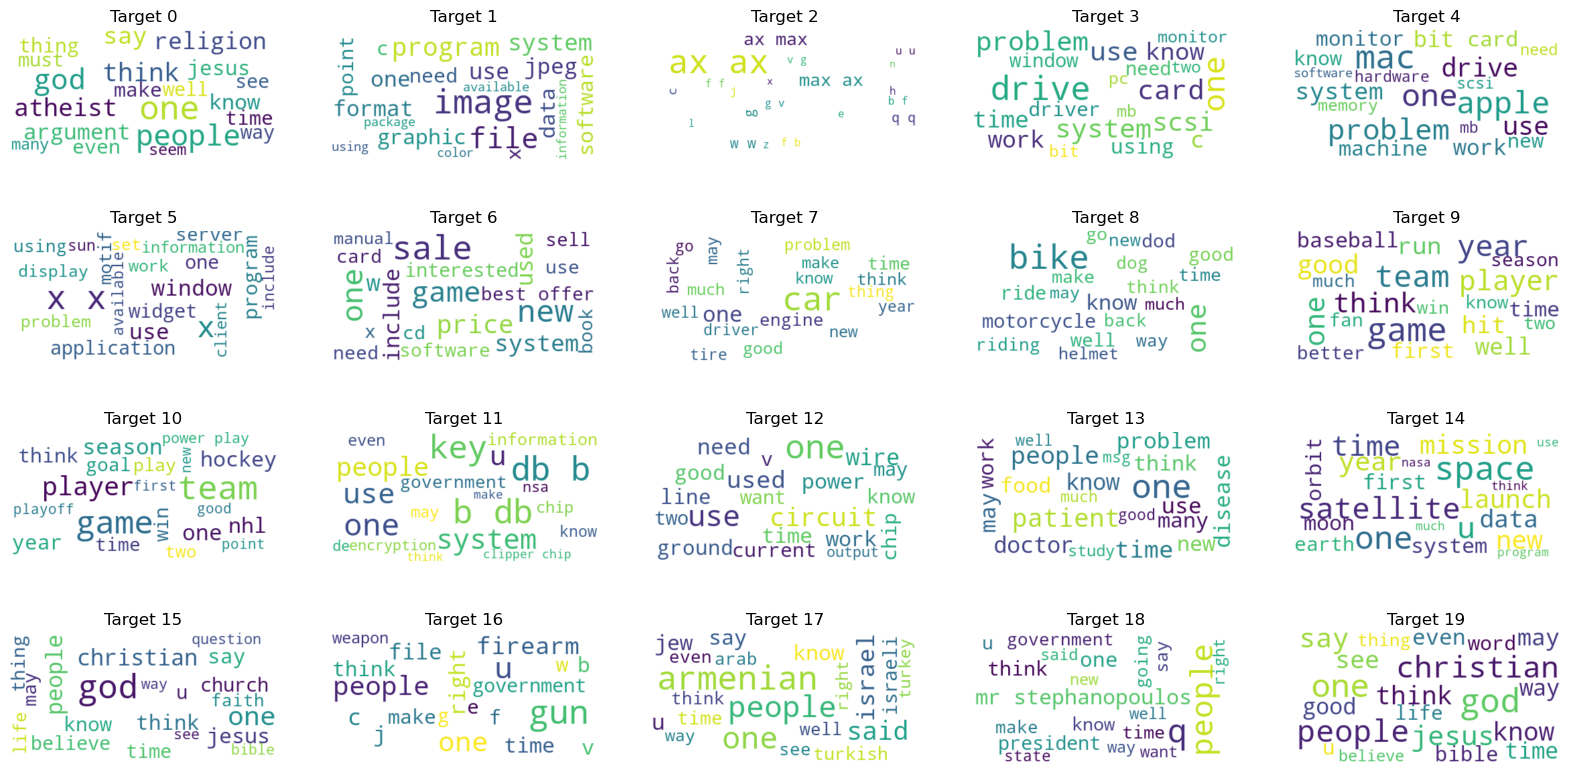

In [20]:
# Set up the plot grid
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))

# Loop through each target value and generate a wordcloud
for i, target in enumerate(range(0, 20)):
    # Get the text for this target value
    text = ' '.join(news_df.loc[news_df['Target'] == target, 'News'])

    # Generate a wordcloud from the text
    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color='white').generate_from_text(text)

    # Create a subplot and plot the wordcloud
    ax = axs[i // 5][i % 5]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Target {target}')
    ax.axis('off')

plt.show()

Above are wordclouds for the 20ng topics for comparison

In [21]:
lda = LatentDirichletAllocation(n_components = 10,
                               random_state = 44,
                               learning_method = 'batch')

lda.fit(news_X)

LatentDirichletAllocation(random_state=44)

In [22]:
lda.components_.shape

(10, 67080)

In [23]:
news_topics = lda.transform(news_X)
news_topics.shape

(11314, 10)

In [24]:
word2topics_lda = map_word2topic(lda.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_lda.index, word2topics_lda.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1       topic 2    topic 3  topic 4     topic 5  \
0        scripture       verse        hudson         ax    would         geb   
1             pope     feustel   ghostscript    syquest      one   intellect   
2            azeri       bronx   coprocessor  mydisplay     know       cadre   
3           henrik   manhattan        yamaha        drv     like    shameful   
4             luke     dtmedin      odometer  panicking      get  skepticism   
5           mormon     catbyte    decoration    quattro   people    chastity   
6          apostle         ico          hong    garrett    think         jxp   
7             corn        ingr       shopper    malcolm     time         dsl   
8          kirlian         qur         phigs     coptic        x   surrender   
9            verse       bobbe           xwd    groucho   anyone        pitt   
10  stephanopoulos  beauchaine          butt        mpc      use      gordon   
11             cci        sank        decnet         sq    could        bank   
12        underdog  intergraph         nutek     zephyr   thanks        soon   
13          bungee        mpeg            es   envelope   window           n   
14          cereal         lib            fd      steam     good      keller   
15          mining     sarcasm  reconsidered      bored     also      quaker   
16              bm        blew   omnipotence    turbine     year     kkeller   
17           creed       queen          opel        fgx  problem         ivy   
18        cassette         tek      junction     redraw     make       ditto   
19         belfour      compaq        vfintd    holiday      say     uniform   

        topic 6    topic 7       topic 8        topic 9  
0           det         iw          iisi           lssu  
1           chi   retarded            vl          maine  
2           tor        ipc            wg       leftover  
3           pit   dubinski           moa          xfree  
4           cal       nist          qemm         yalcin  
5           stl        isc          zeos           onur  
6           ulf       ncsl  motherboards         hopper  
7       metzger        rit         glock         trivia  
8      pmetzger    marital        cooper       truelove  
9            jb       ultb          mpce            mic  
10          har   davewood         johnh            hee  
11        deane      sorta   consumption        kuwaiti  
12          que    boulder            ff       discount  
13      zionism     sleeve      survivor           dell  
14          van     legend     neglected      faceplate  
15          nyi        snm     boxscores  disconcerting  
16          buf   mozumder   cornerstone        somalia  
17  radiologist  syllogism          neil        coolant  
18          bos     virile            ml             ik  
19          njd     tatoos        winqvt         prince

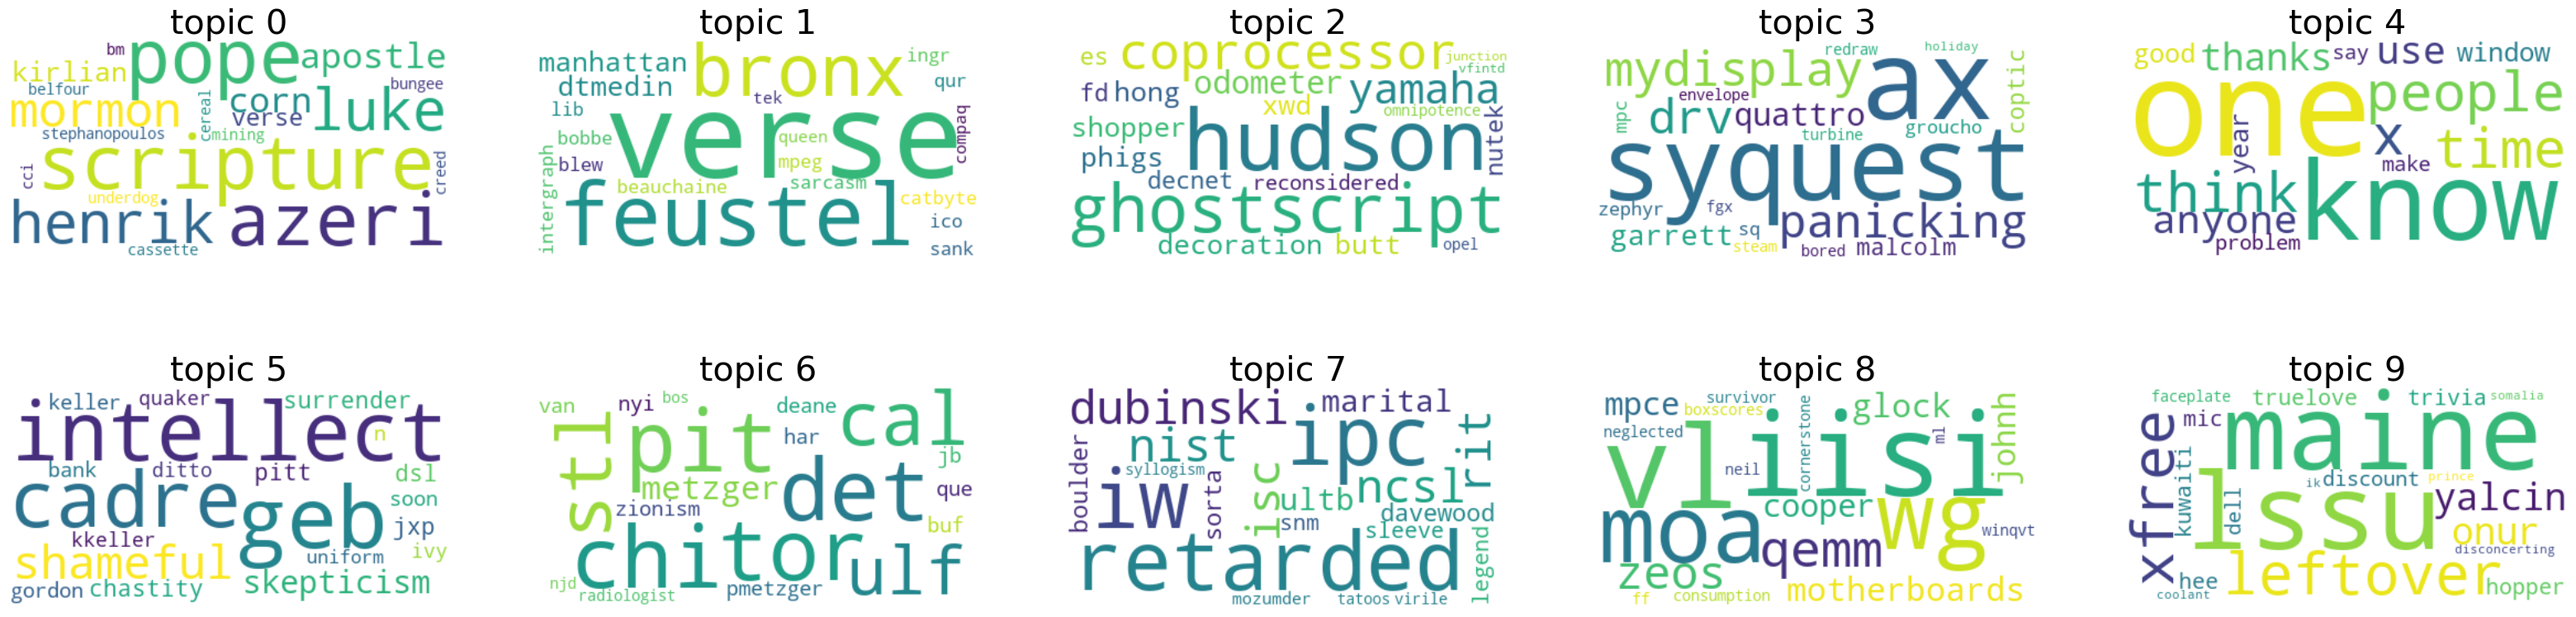

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(40, 10))


for i, topic in enumerate(top_X.columns):
    text = ' '.join(top_X[topic])
    wordcloud = WordCloud(background_color='white', max_words=20).generate_from_text(text)

    # Create a subplot and plot the wordcloud
    ax = axs[i // 5][i % 5]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(topic, fontsize = 30)
    ax.axis('off')
    
plt.show()

While it is fairly hard to compare, we can see some similarities such as in topic 7 here, sharing some similarity with topic 17 of the original, likely relating to politics. Topic 3 here may have some relation to the religion topics in 20ng.

### 20 Component LDA: 20ng

In [26]:
lda = LatentDirichletAllocation(n_components = 20,
                               random_state = 44,
                               learning_method = 'batch')

lda.fit(news_X)
news_topics = lda.transform(news_X)

In [27]:
word2topics_lda = map_word2topic(lda.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_lda.index, word2topics_lda.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1     topic 2    topic 3  topic 4     topic 5  \
0         update     feustel   grayscale         gm    would      gordon   
1       mozumder         bmp      bitmap        det      one         geb   
2            kth         ico          xv        chi     know  skepticism   
3           nada       bronx         ban        ini     like       cadre   
4         deluxe   manhattan         dan        cal      get    shameful   
5            tte       bobbe       witty        tor   people   intellect   
6           corn        sank      slider     reboot    think   surrender   
7         repost  beauchaine         xdm        pit     time    chastity   
8        relates        blew     nearest        que        x         jxp   
9            mom    handheld         jpl  interrupt   anyone         dsl   
10           rit         jmd        qemm        stl      use        pitt   
11        subaru      saturn      decnet        bos    could        bank   
12          ultb       queen      mumble      volvo   thanks        soon   
13  supernatural         tek      hudson        nyi   window           n   
14           snm    homicide  interleave       ohio     good         edu   
15           isc        cobb         pif        har     also     disease   
16         glock    escrowed    mywinobj        buf     year       chris   
17        virile         myi    redesign        fed  problem          zx   
18        tatoos          jb     realise  canadiens     make     liberal   
19      lefebvre         sea         dog       mpeg      say     mercury   

        topic 6     topic 7      topic 8       topic 9     topic 10  \
0         flyer  interlaced  ghostscript       francis        champ   
1       lindros    retarded      desktop   azerbaijani      dtmedin   
2            pt      astros       weaver       officer      catbyte   
3      hartford    dubinski        safer         loser         ingr   
4    soderstrom    impaired          ole       missile       keller   
5       octopus         xga    concealed         lunar           sa   
6     sanderson     cocaine        agdam      spending          ivy   
7        telnet      cramer       winqvt      deletion       quaker   
8       gilmour     clayton       guitar        reagan      kkeller   
9        gainey       outta    liverpool           dog        upenn   
10       ottawa       alias    ascension         comic      offense   
11        bruin    anarchal      probert      magellan         pope   
12    workspace         csd      xmosaic         older   networking   
13  radiologist         tag          sky       voltage           iw   
14          cci        hulk         quit           ban        uunet   
15         nist   wolverine        chris  presentation         uucp   
16           vw      techno         lamp  interference   intergraph   
17         ncsl      pirate      blessed          ifas  rosicrucian   
18   goaltender    vladimir          est        soviet        liked   
19           ti          mu           su           gnv      bastard   

      topic 11   topic 12  topic 13      topic 14    topic 15       topic 16  \
0          cub      ditto       dog   convertible       brian        captain   
1          sox     arafat     honda         nanao     hewlett         traded   
2       jumper         sb  register          chop        carl           olwm   
3      pitcher    fantasy        sc         biker    donation        mcguire   
4       dodger    groucho   liberty     photoshop     tracing           vpic   
5       inning    disease    mormon          raid        mead             cg   
6       conner      excel      rare   continental         sol        hillary   
7        staff         wc     trace  acceleration          bc       sprocket   
8       runner    catcher       dip        mormon       nigel           sink   
9          dog         re    rubber           lud     packard         theist   
10      keenan      ozone   sunrise     

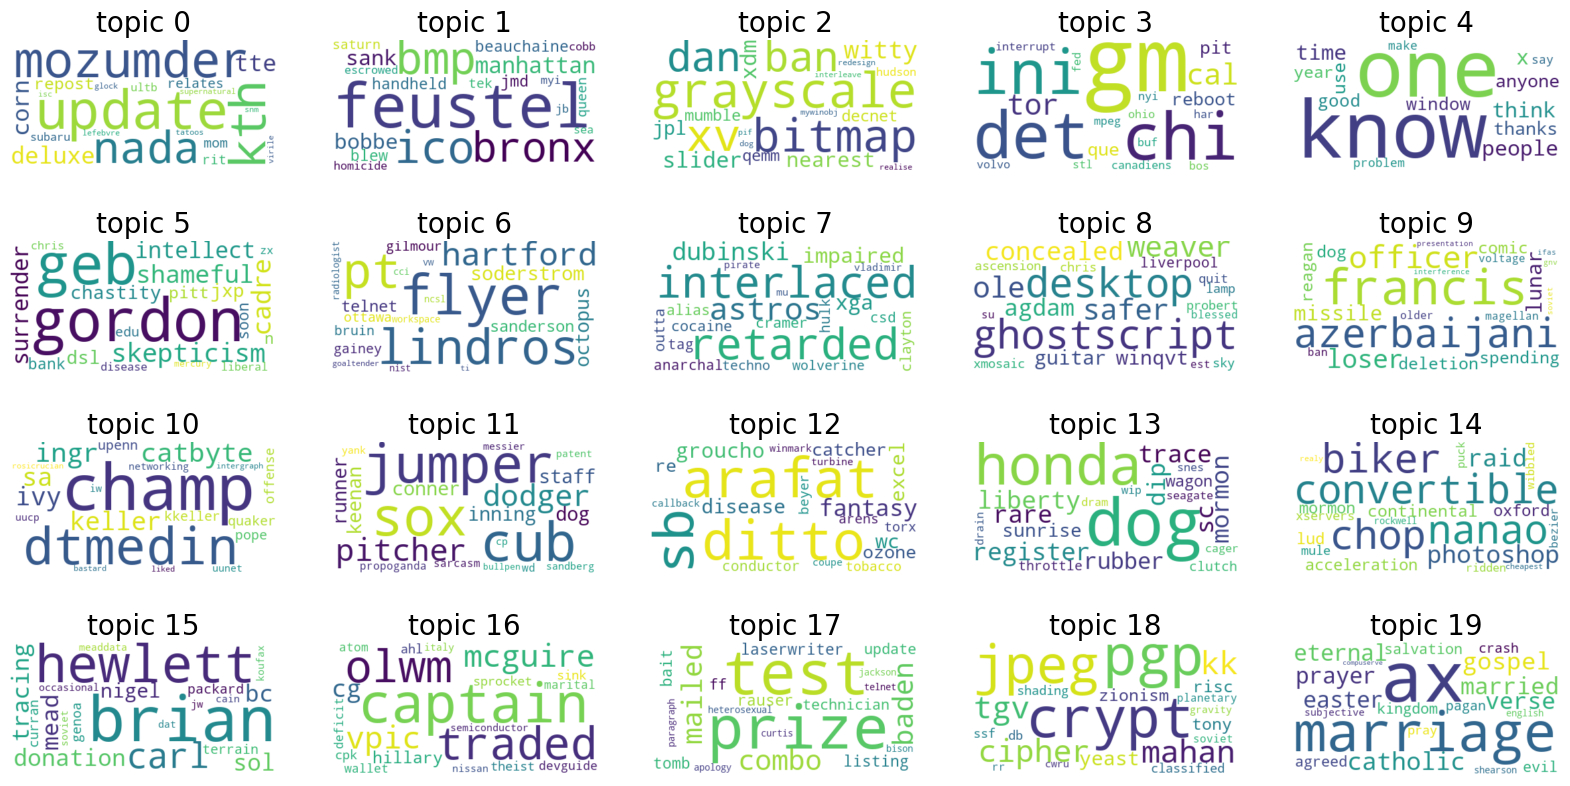

In [28]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))


for i, topic in enumerate(top_X.columns):
    text = ' '.join(top_X[topic])
    wordcloud = WordCloud(background_color='white', max_words=20).generate_from_text(text)

    # Create a subplot and plot the wordcloud
    ax = axs[i // 5][i % 5]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(topic, fontsize = 20)
    ax.axis('off')
    
plt.show()

Here we see some more separation, but still much overlap with categories like topic 0 having linux and homosexuality in the same topic, but also some more cohesive topics like 15 likely being most related to the mideast politics topic, though similar to 11.

### 50 Component LDA: 20ng

In [29]:
lda = LatentDirichletAllocation(n_components = 50,
                               random_state = 44,
                               learning_method = 'batch')

lda.fit(news_X)
news_topics = lda.transform(news_X)

In [30]:
word2topics_lda = map_word2topic(lda.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_lda.index, word2topics_lda.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1        topic 2    topic 3  topic 4        topic 5  \
0   pitching        drug         charon        dma        x        toshiba   
1        rbi     disease           ntsc     maxtor   window           dial   
2     inning     patient       graphite     orchid   thanks          combo   
3    pitcher         dog            hal    adaptec     file       sunlight   
4     oriole      koresh    handshaking    mcguire    drive          guzzi   
5   rotation  pittsburgh          fever   harddisk     know        procomm   
6    stadium    received             ti        awd   anyone          drunk   
7    tonight     detroit          pluto        mfm      use       tinnitus   
8    bullpen   insurance         forged    shading    would         sequel   
9    pitched      health  disappointing         ti     card     clementine   
10   starter     playoff            tio  messenger      get        shining   
11   hitting        york         button       bird      one            dir   
12     tiger    evidence        calibra    clayton  problem          yeast   
13  phillies         gay     phonograph     scorer   please       vonnegut   
14      farr   treatment      extracted     yalcin   system             cx   
15        cy   published            ddd       onur     like            hee   
16    hitter    compound       sticking      award     work             pm   
17    batter    interest         graeme      nutek  program           omar   
18   clemens      helmet           darn         sy     need  shrinkwrapped   
19   griffin     setting          arbor  harddrive        c         skcgoh   

        topic 6       topic 7        topic 8     topic 9  ...     topic 40  \
0          hawk      lebanese          cview      henrik  ...       easter   
1            gm       antenna           pope       azeri  ...          dsp   
2        forgot        saddam            dig     gentile  ...          jsc   
3        morris       iranian         raster    karabakh  ...           gm   
4        conner       inherit           bell     divorce  ...         wage   
5       moncton  collaborator           hite      vfintd  ...        nords   
6     shortstop     cleansing           baku   precedent  ...     passover   
7            cp         arens      adjective  commitment  ...      quattro   
8           sox            gm          cheat         zip  ...      thereof   
9      kawasaki      aviation        winmark  azerbadjan  ...       diesel   
10          ahl        patrol             pp    homeland  ...         teel   
11      houston      infrared  visualization       marry  ...    advertise   
12         rick        murray         viewer       sedan  ...        myers   
13       rauser       fedorov        genetic     kovalev  ...       ottawa   
14        yeast         caste          olson      yassin  ...       tenant   
15      progman   intravenous      courtnall    template  ...      coolant   
16        nanci         koran     distortion          jw  ...      stewart   
17         expo  intersection         hooked    dortmund  ...      jointly   
18  springfield          pork           sane     athlete  ...  testimonial   
19          gpf             z       printing     nagorno  ...         cain   

    topic 41   topic 42      topic 43     topic 44    topic 45     topic 46  \
0    seizure      xterm   electricity        deane     catbyte    surrender   
1       corn      intel   cornerstone     rocketry     dtmedin          geb   
2     cereal   colormap          expo        adobe        ingr        cadre   
3      prize     visual    ciphertext        binah          gd       gordon   
4     decnet        rgb     microwave     brandeis  huntsville   skepticism   
5   nickname         rc          todd         pole       medin    intellect   
6        xdm         xc        savard      wscrawl  intergraph     chastity   
7      xfree  invisible          geez       fooled         ssd          jxp   
8       ansi    

IndexError: index 8 is out of bounds for axis 0 with size 8

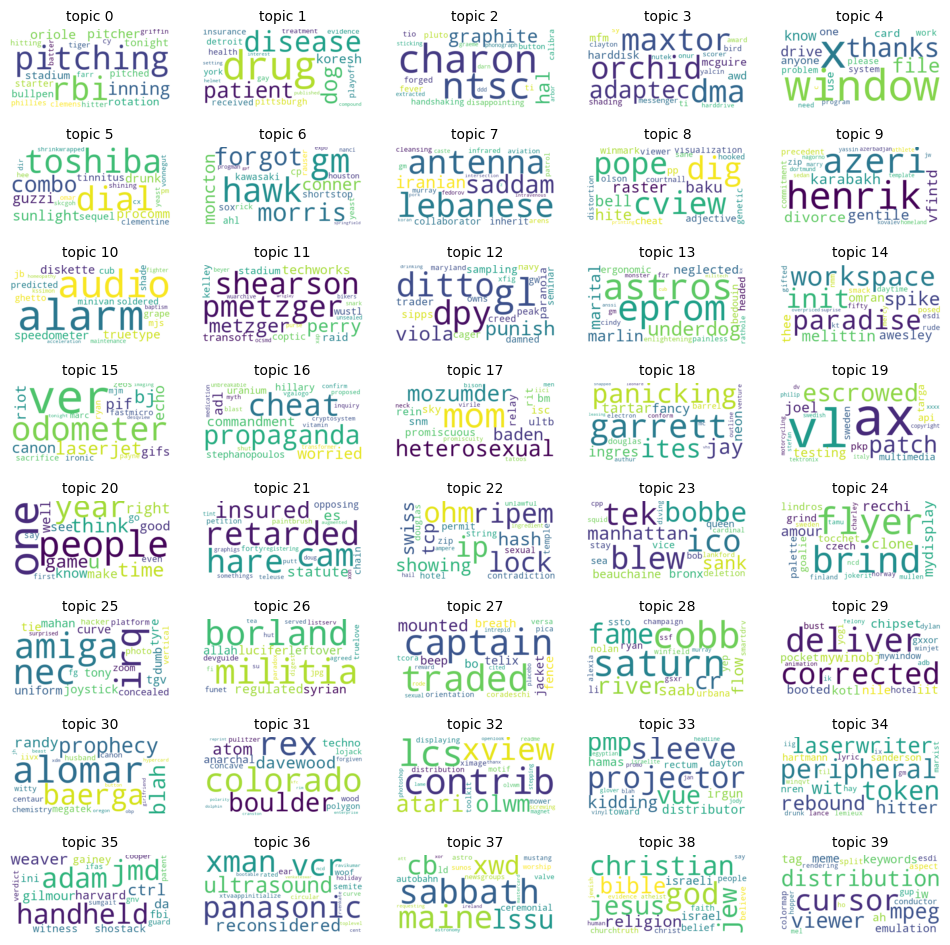

In [31]:
fig, axs = plt.subplots(nrows=8, ncols=5, figsize=(12, 12))


for i, topic in enumerate(top_X.columns):
    text = ' '.join(top_X[topic])
    wordcloud = WordCloud(background_color='white', max_words=20).generate_from_text(text)

    # Create a subplot and plot the wordcloud
    ax = axs[i // 5][i % 5]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(topic, fontsize = 10)
    ax.axis('off')
    
plt.show()

At this point it is hard to directly compare, but we see some cohesive topics like 8 with 'window', 'drive', and 'card', topic 33 appearing to be relating to atheism, and some others. Overall it does not seem to be extremely accurate though.

### 10 Component LDA: DUC 2001

In [32]:
tfid_vec = TfidfVectorizer(tokenizer=lambda x: str(x).split())
X = tfid_vec.fit_transform(df['contents'])
X.shape
terms = tfid_vec.get_feature_names_out()

C:\Users\chase\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
lda = LatentDirichletAllocation(n_components = 10,
                               random_state = 44,
                               learning_method = 'batch')

lda.fit(X)
topics = lda.transform(X)

In [34]:
word2topics_lda = map_word2topic(lda.components_, terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_lda.index, word2topics_lda.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0         topic 1    topic 2        topic 3       topic 4  \
0     johnson             plo       said     yugoslavia           bse   
1     steroid         insurer  hurricane        slovene         chong   
2         ben          morgan       fire        croatia             q   
3        drug          searle       year         serbia          gate   
4       lewis         pension     police       yugoslav          kudu   
5     francis            davy         mr      slovenian          swai   
6    canadian           tokai      state       republic           cow   
7     athlete          andrew      would       slovenia        leland   
8       medal         insured    eclipse       cellrule          herd   
9    sprinter            oecd     people   independence       perkins   
10   olympics            hale        say        serbian         prion   
11    toronto         solomon        oil      tablecell         dairy   
12   astaphan           waitz        one     limitation     weintraub   
13   cellrule         lebanon    diamond         tablet  contaminated   
14      sport          arafat    welfare      seniority          paek   
15      seoul  industrialized          u      ljubljana    astronomer   
16    olympic   meteorologist      nafta      jordanian        baxter   
17      meter        colombia   official          garza      imported   
18       carl           arkin      exxon  confederation           zoo   
19  issajenko         despain       mile         sacher     ethiopian   

           topic 5    topic 6    topic 7         topic 8     topic 9  
0           thomas     cattle    tornado              tb     colosio  
1            court    disease      crash         disease   telescope  
2         diabetes        bse     census        hispanic      hawaii  
3          supreme       coca     tunnel             cjd     beatriz  
4         clarence      chile      alien        infected       mauna  
5              nra        liz   aircraft        diabetes    plaatjes  
6   constitutional      sheep     french           sheep   pensacola  
7       nomination   huallaga    illegal           sheet      kasper  
8           senate     flores        jet          cattle     rollins  
9          insulin  smallwood    crashed        epidemic   lexington  
10             bse    britain     engine         scrapie    martinez  
11         nominee     banned          f             cdc         gmt  
12          guzman       laux       seat      spongiform  astronomer  
13    constitution      offal        air             hiv    castillo  
14       regulated       peru      pilot          gandhi       orion  
15      limitation  diagnosed     bureau          morote      corona  
16           peace    gourlay    britain  encephalopathy         kea  
17    confirmation        cow       beef         pizarro     sendero  
18     affirmative   browning      count           hatch     chantal  
19            yale    finland  insurance          guzman     crovitz

### 20 Component LDA: DUC 2001

In [35]:
lda = LatentDirichletAllocation(n_components = 20,
                               random_state = 44,
                               learning_method = 'batch')

lda.fit(X)
topics = lda.transform(X)

word2topics_lda = map_word2topic(lda.components_, terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_lda.index, word2topics_lda.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1         topic 2        topic 3     topic 4  \
0       said     shining             bse        welfare     eclipse   
1       fire        path          cattle         reform      tunnel   
2       year      guzman             cow  assassination       crash   
3      state        coca           sheep        clinton    marathon   
4      would    fujimori             mad      programme       plane   
5         mr   guerrilla      spongiform           path         sun   
6    johnson       zanti         scrapie      recipient        race   
7     people        peru  encephalopathy        shining     british   
8        say        lima         britain          slain      french   
9        oil      searle           perot          taylo      flight   
10       one      garcia       diagnosed         cartel         air   
11         u       rebel         venetia        massieu     officer   
12    police    huallaga         conable       assassin     crashed   
13    thomas      latino           tonne           ruiz  commission   
14  official      flores          output          basin      engine   
15     exxon    marathon         clinton           love      police   
16      mile       shear     transmitted         carlos       pilot   
17       new      father            swai          loved   brutality   
18   disease         pan           offal         parity     jackson   
19      last  insurgency          specie      guerrilla    aircraft   

         topic 5       topic 6      topic 7       topic 8     topic 9  \
0        pension        taylor       census     hurricane         ben   
1        insulin     pneumonia     slovenia         storm     olympic   
2           oecd          miss        alien    earthquake     toronto   
3         amylin       welfare      illegal       tornado    sprinter   
4         cooper      hospital   yugoslavia  tuberculosis    olympics   
5        sattler        doctor        count          wind       meter   
6     lenxweiler       actress     republic            tb    canadian   
7     supervisor            st    slovenian        center      runner   
8        hormone          rail         seat           mph      tested   
9      recognize    eurotunnel       serbia       florida  stanozolol   
10  intervention     addiction     yugoslav         sheet     fastest   
11      medalist  hospitalized       bureau            bn      canada   
12         barro        morote     counting        region    enquirer   
13         hayes           sam  immigration      atlantic        davy   
14    healthcare     elizabeth    communist     infection         fan   
15      ramstein         daley      francis      tropical       coach   
16            pi     physician      counted        andrew     vaccine   
17      pancreas       shining   federation         cause       medal   
18     secretion    ventilator      serbian     louisiana        hale   
19        sunyer        clinic    ljubljana        africa        pack   

          topic 10       topic 11        topic 12    topic 13        topic 14  \
0              plo        diamond        cellrule        bank        cellrule   
1          francis           beer      nomination        debt           chile   
2           bushel             de       tablecell        loan       tablecell   
3          goldwin           mine           hatch     poverty       issajenko   
4         hamilton          carat         nominee     preston           daley   
5           arafat          rough          misawa  developing  industrialized   
6          madison         cartel        danforth     lending         chilean   
7           snider           kudu        astaphan   reduction             chj   
8         bluedorn        colosio      commission       latin             cvj   
9            stead         dealer  discrimination      burden        astaphan   
10            trap           sale      employment      debtor        overseas   
11     

### 50 Component LDA: DUC 2001

In [36]:
lda = LatentDirichletAllocation(n_components = 50,
                               random_state = 44,
                               learning_method = 'batch')

lda.fit(X)
topics = lda.transform(X)

word2topics_lda = map_word2topic(lda.components_, terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_lda.index, word2topics_lda.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0       topic 1    topic 2       topic 3       topic 4  \
0          gandhi      mcnamara       gray        guzman         hatch   
1           kates  championship     misawa     addiction         garza   
2         massieu         golob      sahel        morote       village   
3            gray         arkin     biopsy    allegation   catastrophe   
4           india          iaaf      iwate     physician           pan   
5            ruiz         shame   croatian        clinic          joan   
6           carat          rome  ljubljana  acknowledged   yellowstone   
7   assassination        manage          f          pill       insurer   
8           rocha       gretzky      tokyo    painkiller        saving   
9           munoz       scandal       serb         betty        rotary   
10          tamil     discharge    vanedoe      sleeping          iran   
11         levine         bligh   forested    misconduct   palestinian   
12          caste          hull     bailed          ford    foundation   
13          hindu     negligent  breakaway           god      wreckage   
14            pri     northward        wet      highland     pesticide   
15      automatic         wayne   austrian     elizabeth     lockerbie   
16       currency        joyner     favero       charest         jumbo   
17      coalition        louise     sutton    prescribed  jurisdiction   
18  parliamentary     displaced       grab     appointed       bolivar   
19          delhi       leaking    prudent         rumor       banking   

        topic 5      topic 6   topic 7         topic 8    topic 9  ...  \
0       vaccine        crash   welfare         gilbert    jwaneng  ...   
1       vermund          jet   country          zimmer     finsch  ...   
2       ikangaa         navy    census           surge   gulfport  ...   
3         saudi          air     house      huntsville        pit  ...   
4     samuelson     aircraft     state      hemisphere      metre  ...   
5   kristiansen  ventilation   billion        category      carat  ...   
6           ton           lt     alien      federation    soybean  ...   
7     haseltine       german       aid     determining      tonne  ...   
8        froggy    remscheid    reform      bureaucrat        hay  ...   
9        arabia          maj      plan         circuit       lyng  ...   
10     finisher     assigned   illegal    meterologist      depth  ...   
11       shield      finland      bill        equality       haul  ...   
12     medalist          flu    senate       instructs      slosh  ...   
13     ferrying    pensacola      seat       citizerns     barker  ...   
14        kenya       kasper  republic          meyers     gaston  ...   
15   marathoner     helsinki   federal          deduct       palm  ...   
16      missile        naval  congress           stein   harrison  ...   
17      kingdom     squadron       run           moore         km  ...   
18    peninsula    lexington    leader        residing    yeutter  ...   
19       kuwait         nato     count  reapportioning  fitzwater  ...   

          topic 40        topic 41        topic 42      topic 43    topic 44  \
0          venetia           sheet            fagg     seniority   hurricane   
1          preston            hugo         cozette         prion        fire   
2            daley     atmospheric      management    electorate     eclipse   
3         astaphan         gilbert      moratorium        riegle        mile   
4          lending       caribbean        boundary     signatory        area   
5            tonne          bushel       delebarre            nd       storm   
6              ore   meteorologist  recommendation       freeman  earthquake   
7             raid       slovenian         rifkind     coalition         new   
8           palace            debt            rode         hence      forest   
9    irresponsible          global     yellowstone      collinge        city   
10         gastrow  

### 10 Component NMF: 20ng

In [37]:
nmf = NMF(n_components = 10,
          random_state = 44)

nmf.fit(news_X)
lda.components_.shape

(50, 14818)

In [38]:
news_topics = nmf.transform(news_X)
news_topics.shape

(11314, 10)

In [39]:
word2topics_nmf = map_word2topic(nmf.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_nmf.index, word2topics_nmf.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1      topic 2     topic 3   topic 4     topic 5  \
0    would       drive       window         key      game         geb   
1   people        scsi         file        chip      team         dsl   
2      one        disk           do  encryption    player       cadre   
3    think        hard      program     clipper      year    chastity   
4     like          mb      problem         bit    season         jxp   
5    right      floppy          use      escrow      play        pitt   
6      get         ide      version      system       win    shameful   
7     time  controller  application       phone    hockey   intellect   
8    thing          cd            m  government    league  skepticism   
9      gun      system         font   algorithm      last   surrender   
10    well        boot      manager         use       fan      gordon   
11     car          hd      running    security  baseball        bank   
12       u         meg        using         nsa       nhl           n   
13    make       cable    directory      secure       run        soon   
14    year        tape       driver      public   playoff         edu   
15    good         rom       system      number     first     patient   
16     say         mac          run   encrypted      good        lyme   
17    much     problem       screen           k        go       blood   
18    know      jumper          win         law      best    migraine   
19     see          do          ftp      secret   detroit     medical   

        topic 6 topic 7       topic 8  topic 9  
0        thanks       x           god     card  
1        please       r         jesus   driver  
2          mail  server     christian    video  
3        anyone       c         bible  monitor  
4          know       p       believe    color  
5             e       w         faith      bus  
6       advance       z           say       mb  
7         email   motif        christ      vga  
8         would    mode        belief      bit  
9       looking       n        church      ram  
10      address       b      religion   memory  
11           hi       h           one      mhz  
12         info     mit        people     slot  
13         send       v          life     port  
14         list       f         truth  problem  
15         help       l       atheist     mode  
16        could  client           sin    board  
17  information       k          word      mac  
18        reply     sun        heaven        k  
19         post       g  christianity   system

### 20 Component NMF: 20ng

In [40]:
nmf = NMF(n_components = 20,
          random_state = 44,
         max_iter = 500)

nmf.fit(news_X)
news_topics = nmf.transform(news_X)

word2topics_nmf = map_word2topic(nmf.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_nmf.index, word2topics_nmf.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1     topic 2     topic 3   topic 4     topic 5  \
0         one       drive       offer         key      game         geb   
1       think        disk        sale        chip      team         dsl   
2         get        hard       price  encryption    player       cadre   
3      people      floppy         new     clipper      year         jxp   
4       thing        boot    shipping      escrow    season    chastity   
5        know          cd   condition         bit      play        pitt   
6        time         ide        sell       phone       win    shameful   
7        like     problem     printer   algorithm    hockey   intellect   
8        good      jumper      manual      system    league  skepticism   
9         say       cable       modem  government      last   surrender   
10       well  controller      asking         nsa       fan      gordon   
11        see         rom         mac      secure       nhl        bank   
12     really      switch    software    security  baseball           n   
13       want          do        used      secret   playoff        soon   
14    problem    internal        best   encrypted       run         edu   
15       much          hd       email         use   detroit     patient   
16  something        tape  interested      number      goal        lyme   
17       even       power         box      public     first       blood   
18       make     quantum         one          de   toronto    migraine   
19        way     setting       brand      agency       hit     medical   

        topic 6      topic 7       topic 8  topic 9    topic 10 topic 11  \
0        thanks            x           god     card    armenian        c   
1        please       server         jesus   driver     turkish        p   
2        anyone            r     christian    video     armenia        r   
3          mail         mode         bible  monitor    genocide        k   
4          know        motif         faith    color        turk        w   
5             e       client       believe      vga      turkey        v   
6       advance      display        christ     mode      muslim        e   
7            hi          mit        belief  graphic      people        b   
8       address     terminal        church      ati     russian        g   
9          info          sun           say     slot       azeri        n   
10      looking       widget      religion  diamond      soviet        h   
11        email  application          life  problem       greek        l   
12        reply          run           sin      bus  government        u   
13         list      support         truth    nubus  azerbaijan        q   
14         post      running        people     vesa        said        f   
15         help        using       atheist      bit        nazi        z   
16         send         line        heaven    mouse       argic        j   
17  information        color             u      vlb      serdar       ax   
18        could      graphic          word     svga  population      com   
19      anybody          ncd  christianity     port    massacre      edu   

       topic 12   topic 13    topic 14     topic 15   topic 16     topic 17  \
0        window       file         gun       israel        car        would   
1            do        ftp         law      israeli       bike         like   
2       program     format  government         arab       mile        could   
3       manager    program      people          jew     engine  appreciated   
4       problem  directory       right  palestinian     dealer   appreciate   
5          font      image       crime        state      speed      someone   
6             m        gif       state       jewish       tire         also   
7       version        bmp      weapon     lebanese     driver      greatly   
8   application        zip           u        peace          k         help   
9       running       disk     firearm     

### 50 Component NMF: 20ng

In [41]:
nmf = NMF(n_components = 50,
          random_state = 44,
         max_iter = 500)

nmf.fit(news_X)
news_topics = nmf.transform(news_X)

word2topics_nmf = map_word2topic(nmf.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_nmf.index, word2topics_nmf.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1      topic 2    topic 3   topic 4     topic 5  \
0       people       drive       server        key      team         geb   
1         many        disk        motif        bit    player         dsl   
2         life        hard       widget     escrow       win       cadre   
3          gay      floppy            r     public       nhl         jxp   
4   homosexual          cd  application         de    hockey    chastity   
5          msg        boot          sun        pgp      play        pitt   
6       person         ide         list        rsa    league    shameful   
7         food      jumper      version        nsa    season   intellect   
8         drug       cable       client     secret       fan  skepticism   
9       others  controller          mit     serial      best   surrender   
10    religion         rom         code    session      goal      gordon   
11       world    internal      display    message     stats        bank   
12         men      switch    available   security  baseball           n   
13        want          hd       source     agency     point        soon   
14       group     quantum          run  encrypted       cup         edu   
15        know       power     software          n   toronto     patient   
16       death     setting        patch     attack  european        lyme   
17     society        tape         user  algorithm    ranger       blood   
18         job    external        using     random     coach    migraine   
19        even         meg      support        two    better     medical   

        topic 6      topic 7    topic 8      topic 9  ...    topic 40  \
0        thanks            x        god         card  ...    question   
1        anyone         mode    believe        video  ...      answer   
2          know     terminal    atheist         slot  ...        post   
3       advance           hz      faith          bus  ...       group   
4            hi            r       hell      graphic  ...     article   
5   appreciated          ncd  existence          ati  ...         ask   
6          info       server     heaven        nubus  ...     posting   
7       looking        entry     belief          vga  ...         faq   
8          help  programming    atheism          vlb  ...        read   
9       anybody       output          u           pc  ...        time   
10  information         vesa      truth          isa  ...        true   
11    wondering            z      exist   controller  ...  discussion   
12     anything       cursor      bible           pd  ...   newsgroup   
13         find           cg       life         vesa  ...        book   
14         site      support       lord  performance  ...    response   
15   appreciate         svga        sin         mode  ...     atheist   
16         book       client        say        ultra  ...        many   
17      greatly    speedstar    eternal         eisa  ...     science   
18          ftp      diamond      satan       orchid  ...       asked   
19       source          lib       must      stealth  ...    original   

     topic 41    topic 42 topic 43     topic 44   topic 45    topic 46  \
0        like     printer    think            v       file         new   
1       sound        font      say        modem     format        york   
2   something       print     well           bi  directory       brand   
3        look       laser     good          fax        ftp       price   
4       thing          hp    thing         data        bmp        lost   
5     someone  postscript   really         baud        gif          st   
6         lot    truetype      see      voltage      cview     chicago   
7         etc         ink     know            k        zip  pittsburgh   
8        post   character       go          max        win         san   
9        yeah           p     make          bps       disk  technology   
10        got          bj     much        power    convert    

### 10 Component NMF: DUC 2001

In [42]:
nmf = NMF(n_components = 10,
          random_state = 44,
         max_iter = 500)

nmf.fit(news_X)
news_topics = nmf.transform(news_X)

word2topics_nmf = map_word2topic(nmf.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_nmf.index, word2topics_nmf.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1      topic 2     topic 3   topic 4     topic 5  \
0    would       drive       window         key      game         geb   
1   people        scsi         file        chip      team         dsl   
2      one        disk           do  encryption    player       cadre   
3    think        hard      program     clipper      year    chastity   
4     like          mb      problem         bit    season         jxp   
5    right      floppy          use      escrow      play        pitt   
6      get         ide      version      system       win    shameful   
7     time  controller  application       phone    hockey   intellect   
8    thing          cd            m  government    league  skepticism   
9      gun      system         font   algorithm      last   surrender   
10    well        boot      manager         use       fan      gordon   
11     car          hd      running    security  baseball        bank   
12       u         meg        using         nsa       nhl           n   
13    make       cable    directory      secure       run        soon   
14    year        tape       driver      public   playoff         edu   
15    good         rom       system      number     first     patient   
16     say         mac          run   encrypted      good        lyme   
17    much     problem       screen           k        go       blood   
18    know      jumper          win         law      best    migraine   
19     see          do          ftp      secret   detroit     medical   

        topic 6 topic 7       topic 8  topic 9  
0        thanks       x           god     card  
1        please       r         jesus   driver  
2          mail  server     christian    video  
3        anyone       c         bible  monitor  
4          know       p       believe    color  
5             e       w         faith      bus  
6       advance       z           say       mb  
7         email   motif        christ      vga  
8         would    mode        belief      bit  
9       looking       n        church      ram  
10      address       b      religion   memory  
11           hi       h           one      mhz  
12         info     mit        people     slot  
13         send       v          life     port  
14         list       f         truth  problem  
15         help       l       atheist     mode  
16        could  client           sin    board  
17  information       k          word      mac  
18        reply     sun        heaven        k  
19         post       g  christianity   system

### 20 Component NMF: DUC 2001

In [43]:
nmf = NMF(n_components = 20,
          random_state = 44,
         max_iter = 500)

nmf.fit(news_X)
news_topics = nmf.transform(news_X)

word2topics_nmf = map_word2topic(nmf.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_nmf.index, word2topics_nmf.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1     topic 2     topic 3   topic 4     topic 5  \
0         one       drive       offer         key      game         geb   
1       think        disk        sale        chip      team         dsl   
2         get        hard       price  encryption    player       cadre   
3      people      floppy         new     clipper      year         jxp   
4       thing        boot    shipping      escrow    season    chastity   
5        know          cd   condition         bit      play        pitt   
6        time         ide        sell       phone       win    shameful   
7        like     problem     printer   algorithm    hockey   intellect   
8        good      jumper      manual      system    league  skepticism   
9         say       cable       modem  government      last   surrender   
10       well  controller      asking         nsa       fan      gordon   
11        see         rom         mac      secure       nhl        bank   
12     really      switch    software    security  baseball           n   
13       want          do        used      secret   playoff        soon   
14    problem    internal        best   encrypted       run         edu   
15       much          hd       email         use   detroit     patient   
16  something        tape  interested      number      goal        lyme   
17       even       power         box      public     first       blood   
18       make     quantum         one          de   toronto    migraine   
19        way     setting       brand      agency       hit     medical   

        topic 6      topic 7       topic 8  topic 9    topic 10 topic 11  \
0        thanks            x           god     card    armenian        c   
1        please       server         jesus   driver     turkish        p   
2        anyone            r     christian    video     armenia        r   
3          mail         mode         bible  monitor    genocide        k   
4          know        motif         faith    color        turk        w   
5             e       client       believe      vga      turkey        v   
6       advance      display        christ     mode      muslim        e   
7            hi          mit        belief  graphic      people        b   
8       address     terminal        church      ati     russian        g   
9          info          sun           say     slot       azeri        n   
10      looking       widget      religion  diamond      soviet        h   
11        email  application          life  problem       greek        l   
12        reply          run           sin      bus  government        u   
13         list      support         truth    nubus  azerbaijan        q   
14         post      running        people     vesa        said        f   
15         help        using       atheist      bit        nazi        z   
16         send         line        heaven    mouse       argic        j   
17  information        color             u      vlb      serdar       ax   
18        could      graphic          word     svga  population      com   
19      anybody          ncd  christianity     port    massacre      edu   

       topic 12   topic 13    topic 14     topic 15   topic 16     topic 17  \
0        window       file         gun       israel        car        would   
1            do        ftp         law      israeli       bike         like   
2       program     format  government         arab       mile        could   
3       manager    program      people          jew     engine  appreciated   
4       problem  directory       right  palestinian     dealer   appreciate   
5          font      image       crime        state      speed      someone   
6             m        gif       state       jewish       tire         also   
7       version        bmp      weapon     lebanese     driver      greatly   
8   application        zip           u        peace          k         help   
9       running       disk     firearm     

### 50 Component NMF: DUC 2001

In [44]:
nmf = NMF(n_components = 50,
          random_state = 44,
         max_iter = 500)

nmf.fit(news_X)
news_topics = nmf.transform(news_X)

word2topics_nmf = map_word2topic(nmf.components_, news_terms, 20)
top_X = pd.DataFrame.from_dict(dict(zip(word2topics_nmf.index, word2topics_nmf.values)))
top_X

C:\Users\chase\AppData\Local\Temp\ipykernel_44436\1170096195.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word2topics = pd.Series()


topic 0     topic 1      topic 2    topic 3   topic 4     topic 5  \
0       people       drive       server        key      team         geb   
1         many        disk        motif        bit    player         dsl   
2         life        hard       widget     escrow       win       cadre   
3          gay      floppy            r     public       nhl         jxp   
4   homosexual          cd  application         de    hockey    chastity   
5          msg        boot          sun        pgp      play        pitt   
6       person         ide         list        rsa    league    shameful   
7         food      jumper      version        nsa    season   intellect   
8         drug       cable       client     secret       fan  skepticism   
9       others  controller          mit     serial      best   surrender   
10    religion         rom         code    session      goal      gordon   
11       world    internal      display    message     stats        bank   
12         men      switch    available   security  baseball           n   
13        want          hd       source     agency     point        soon   
14       group     quantum          run  encrypted       cup         edu   
15        know       power     software          n   toronto     patient   
16       death     setting        patch     attack  european        lyme   
17     society        tape         user  algorithm    ranger       blood   
18         job    external        using     random     coach    migraine   
19        even         meg      support        two    better     medical   

        topic 6      topic 7    topic 8      topic 9  ...    topic 40  \
0        thanks            x        god         card  ...    question   
1        anyone         mode    believe        video  ...      answer   
2          know     terminal    atheist         slot  ...        post   
3       advance           hz      faith          bus  ...       group   
4            hi            r       hell      graphic  ...     article   
5   appreciated          ncd  existence          ati  ...         ask   
6          info       server     heaven        nubus  ...     posting   
7       looking        entry     belief          vga  ...         faq   
8          help  programming    atheism          vlb  ...        read   
9       anybody       output          u           pc  ...        time   
10  information         vesa      truth          isa  ...        true   
11    wondering            z      exist   controller  ...  discussion   
12     anything       cursor      bible           pd  ...   newsgroup   
13         find           cg       life         vesa  ...        book   
14         site      support       lord  performance  ...    response   
15   appreciate         svga        sin         mode  ...     atheist   
16         book       client        say        ultra  ...        many   
17      greatly    speedstar    eternal         eisa  ...     science   
18          ftp      diamond      satan       orchid  ...       asked   
19       source          lib       must      stealth  ...    original   

     topic 41    topic 42 topic 43     topic 44   topic 45    topic 46  \
0        like     printer    think            v       file         new   
1       sound        font      say        modem     format        york   
2   something       print     well           bi  directory       brand   
3        look       laser     good          fax        ftp       price   
4       thing          hp    thing         data        bmp        lost   
5     someone  postscript   really         baud        gif          st   
6         lot    truetype      see      voltage      cview     chicago   
7         etc         ink     know            k        zip  pittsburgh   
8        post   character       go          max        win         san   
9        yeah           p     make          bps       disk  technology   
10        got          bj     much        power    convert    

# Problem 2
## Extractive Summarization

Implement the KL-Sum summarization method for each dataset. Follow the ideas in this paper ; you are allowed to use libraries for text cleaning, segmentation into sentences, etc. Run it twice :

A) KL_summary based on words_PD; PD is a distribution proportional to counts of words in document

B) LDA_summary based on LDA topics_PD on obtained in PB2. The only difference is that PD, while still a distribution over words, is computed using topic modeling

For DUC dataset evaluate KL_summaries and LDA_summaries against human gold summaries with ROUGE. ROUGE Perl package. Use the "Abstract" part of the files ins folder "Summaries" as the gold summaries.

In [45]:
!pip install rouge

from rouge import Rouge
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel

C:\Users\chase\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [46]:
path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 5A/DUC2001/Summaries/"
duc_abstracts, duc_contents = load_duc2001(path)
df = pd.DataFrame({'abstracts': duc_abstracts, 'contents': duc_contents})
df['abstracts'] = df['abstracts'].astype(str)
df['contents'] = df['contents'].astype(str)

In [47]:
df.head()

abstracts  \
0  ['Some 40 members of Congress have joined with...   
1  ['Multitudes of native peoples, tourists and s...   
2  ['Population experts say that little would cha...   
3  ["The unofficial tornado season runs from Apri...   
4  ['William Gray, a hurricane expert, predicts m...   

                                            contents  
0  A coalition of members of Congress announced\n...  
1  Thousands of peole\nprayed, cheered, danced, b...  
2  If the two sides trying to force changes in\nt...  
3  Rumbling spring thunderstorms have announced t...  
4  A hurricane expert predicts a turbulent summer...

In [66]:
def clean(text):
    # Replace newline characters with spaces
    text = text.replace('\n', ' ')

    # Sentence tokenization
    sentences = nltk.sent_tokenize(text)

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Stem the words
    stemmer = nltk.stem.PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return sentences, words

In [49]:
def calculate_word_frequencies(words):
    word_freq = nltk.FreqDist(words)
    return word_freq

In [50]:
def kl_summary(sentences, words, word_freq, n_sentences):
    sentence_scores = {}
    for i, sentence in enumerate(sentences):
        sentence_word_count = len(word_tokenize(sentence))
        for word in word_freq.keys():
            if word in sentence.lower():
                if i not in sentence_scores:
                    sentence_scores[i] = word_freq[word]
                else:
                    sentence_scores[i] += word_freq[word]

    top_sentences = heapq.nlargest(n_sentences, sentence_scores, key=sentence_scores.get)
    summary = ' '.join([sentences[i] for i in sorted(top_sentences)])
    return summary

In [51]:
def lda_summary(sentences, words, n_sentences, num_topics=10):
    dictionary = Dictionary([words])
    corpus = [dictionary.doc2bow([word]) for word in words]

    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
    
    topic_word_probs = lda_model.get_topics()
    word_probs = np.sum(topic_word_probs, axis=0)
    word_probs /= np.sum(word_probs)

    word_freq_lda = {dictionary[id]: prob for id, prob in enumerate(word_probs)}

    return kl_summary(sentences, words, word_freq_lda, n_sentences)

In [68]:
def generate_summaries(row):
    sentences, words = clean(row['contents'])
    
    if not words:
        return pd.Series(['', ''])

    word_freq = calculate_word_frequencies(words)

    # KL-summary
    kl_summary_text = kl_summary(sentences, words, word_freq, n_sentences=10)

    # LDA-summary
    lda_summary_text = lda_summary(sentences, words, n_sentences=10)

    return pd.Series([kl_summary_text, lda_summary_text])


df[['kl_summary', 'lda_summary']] = df.apply(generate_summaries, axis=1)


In [69]:
df

abstracts  \
0    ['Some 40 members of Congress have joined with...   
1    ['Multitudes of native peoples, tourists and s...   
2    ['Population experts say that little would cha...   
3    ["The unofficial tornado season runs from Apri...   
4    ['William Gray, a hurricane expert, predicts m...   
..                                                 ...   
299  ['Some members of congress argue that the Seco...   
300  ["Robert Barro discusses his surprise that som...   
301  ['In response to a "free market" stand against...   
302  ['Writers of "Letters to the Editor" of the Wa...   
303  ['The author of an article in the Wall Street ...   

                                              contents  \
0    A coalition of members of Congress announced\n...   
1    Thousands of peole\nprayed, cheered, danced, b...   
2    If the two sides trying to force changes in\nt...   
3    Rumbling spring thunderstorms have announced t...   
4    A hurricane expert predicts a turbulent summer...   
..                                                 ...   
299  Congress has been dismayingly inconsistent in ...   
300  To economists, term limits sound like minimum ...   
301  As an economist, Robert Barro ("A Free Markete...   
302  In his "Gun Control Is Constitutional" (Counte...   
303  Opponents of any sort of gun control write pas...   

                                            kl_summary  \
0    A coalition of members of Congress announced W...   
1    Thousands of peole prayed, cheered, danced, be...   
2    If the two sides trying to force changes in th...   
3    Rumbling spring thunderstorms have announced t...   
4    A hurricane expert predicts a turbulent summer...   
..                                                 ...   
299  A constitutional amendment calling for the pro...   
300  (It is interesting to note, however, that Hami...   
301  As an economist, Robert Barro ("A Free Markete...   
302  In his "Gun Control Is Constitutional" (Counte...   
303  For example, one letter writer, commenting on ...   

                                           lda_summary  \
0    A coalition of members of Congress announced W...   
1    Thousands of peole prayed, cheered, danced, be...   
2    If the two sides trying to force changes in th...   
3    Rumbling spring thunderstorms have announced t...   
4    A hurricane expert predicts a turbulent summer...   
..                                                 ...   
299  A constitutional amendment calling for the pro...   
300  In each case, the government tries to prevent ...   
301  As an economist, Robert Barro ("A Free Markete...   
302  In his "Gun Control Is Constitutional" (Counte...   
303  For example, one letter writer, commenting on ...   

                                     kl_summary_scores  \
0    {'rouge-1': {'r': 0.5584415584415584, 'p': 0.4...   
1    {'rouge-1': {'r': 0.24358974358974358, 'p': 0....   
2    {'rouge-1': {'r': 0.4457831325301205, 'p': 0.5...   
3    {'rouge-1': {'r': 0.2948717948717949, 'p': 0.3...   
4    {'rouge-1': {'r': 0.527027027027027, 'p': 0.47...   
..                                                 ...   
299  {'rouge-1': {'r': 0.2638888888888889, 'p': 0.1...   
300  {'rouge-1': {'r': 0.2597402597402597, 'p': 0.2...   
301  {'rouge-1': {'r': 0.25882352941176473, 'p': 0....   
302  {'rouge-1': {'r': 0.20270270270270271, 'p': 0....   
303  {'rouge-1': {'r': 0.22077922077922077, 'p': 0....   

                                    lda_summary_scores  
0    {'rouge-1': {'r': 0.5584415584415584, 'p': 0.4...  
1    {'rouge-1': {'r': 0.24358974358974358, 'p': 0....  
2    {'rouge-1': {'r': 0.5060240963855421, 'p': 0.5...  
3    {'rouge-1': {'r': 0.2948717948717949, 'p': 0.3...  
4    {'rouge-1': {'r': 0.527027027027027, 'p': 0.47...  
..                                                 ...  
299  {'rouge-1': {'r': 0.2638888888888889, 'p': 0.1...  
300  {'rouge-1': {'r': 0.2597402597402597, 'p': 0.2...  
301  {'rouge-1': {'r': 0.25882352941176473, 'p'

In [70]:
def evaluate_summary(summary, gold_summary):
    if not summary or not gold_summary:
        return {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
                'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
                'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}

    rouge = Rouge()
    scores = rouge.get_scores(summary, gold_summary, avg=True)
    return scores

In [71]:
def evaluate_summaries(row):
    kl_summary_scores = evaluate_summary(row['kl_summary'], row['abstracts'])
    lda_summary_scores = evaluate_summary(row['lda_summary'], row['abstracts'])
    return pd.Series([kl_summary_scores, lda_summary_scores])

df[['kl_summary_scores', 'lda_summary_scores']] = df.apply(evaluate_summaries, axis=1)

In [72]:
# Convert the score dictionaries into DataFrames
df_kl_scores = pd.DataFrame(df['kl_summary_scores'].apply(pd.Series))
df_lda_scores = pd.DataFrame(df['lda_summary_scores'].apply(pd.Series))

# Extract the F1 scores for each metric
df_kl_f1_scores = df_kl_scores.applymap(lambda x: x['f'])
df_lda_f1_scores = df_lda_scores.applymap(lambda x: x['f'])

# Rename columns to indicate the summarization method
df_kl_f1_scores.columns = [f"KL_{col}" for col in df_kl_f1_scores.columns]
df_lda_f1_scores.columns = [f"LDA_{col}" for col in df_lda_f1_scores.columns]

# Combine the two DataFrames horizontally
df_scores = pd.concat([df_kl_f1_scores, df_lda_f1_scores], axis=1)
df_scores = df_scores.rename(columns={"KL_rouge-l": "KL_rouge-L", "LDA_rouge-l": "LDA_rouge-L"})

# Display the resulting DataFrame with F1 scores
print(df_scores.to_string())

     KL_rouge-1  KL_rouge-2  KL_rouge-L  LDA_rouge-1  LDA_rouge-2  LDA_rouge-L
0      0.554622    0.372781    0.521008     0.554622     0.372781     0.521008
1      0.296875    0.137741    0.281250     0.386100     0.225806     0.378378
2      0.455696    0.203966    0.345992     0.501992     0.267380     0.390438
3      0.398374    0.247059    0.382114     0.398374     0.247059     0.382114
4      0.404762    0.235616    0.404762     0.404762     0.235616     0.404762
5      0.368000    0.190202    0.360000     0.368000     0.190202     0.360000
6      0.500000    0.274390    0.465517     0.500000     0.274390     0.465517
7      0.320856    0.068966    0.288770     0.309278     0.067164     0.278351
8      0.387097    0.142415    0.350230     0.387097     0.142415     0.350230
9      0.320000    0.154613    0.266667     0.315457     0.146919     0.258675
10     0.349593    0.157746    0.325203     0.345382     0.155556     0.321285
11     0.302158    0.119107    0.273381     0.302158

In [73]:
df['kl_summary'][1]

"Thousands of peole prayed, cheered, danced, beat drums and observed other traditions today as a total eclipse of the sun darkened a wide area of Indonesia and the southern Philippines. A partial eclipse was visible across a wide area of Asia as far west as India _ including Southeast Asia, China, Japan and New Guinea as well as parts of Australia and the Pacific islands. Clouds obscured the solar spectacular in Jakarta, Indonesia, Hong Kong and in the eastern Mindanao city of Davao, where thousands of tourists and scientists had gathered to observe the eclipse. Richard Fisher of the High Altitude Observatory in Boulder, Colo., said that despite scattered clouds, scientists were confident they had taken useful pictures of the eclipse. In Jakarta, Wilson Sinambela of the National Institute of Aeronautics said a total eclipse was observed in several parts of the country, including by about 1,000 tourists in the South Sumatra capital Palembang. He said thousands of Indonesians prayed and 

In [75]:
df['lda_summary'][1]

"Thousands of peole prayed, cheered, danced, beat drums and observed other traditions today as a total eclipse of the sun darkened a wide area of Indonesia and the southern Philippines. The sun was blacked out by the shadow of the moon for up to four minutes along a 108-mile swath that moved from the Indian Ocean across Indonesia and the southern Philippine island of Mindanao. A partial eclipse was visible across a wide area of Asia as far west as India _ including Southeast Asia, China, Japan and New Guinea as well as parts of Australia and the Pacific islands. Clouds obscured the solar spectacular in Jakarta, Indonesia, Hong Kong and in the eastern Mindanao city of Davao, where thousands of tourists and scientists had gathered to observe the eclipse. Richard Fisher of the High Altitude Observatory in Boulder, Colo., said that despite scattered clouds, scientists were confident they had taken useful pictures of the eclipse. In Jakarta, Wilson Sinambela of the National Institute of Aer

In [74]:
df['contents'][1]

"Thousands of peole\nprayed, cheered, danced, beat drums and observed other traditions\ntoday as a total eclipse of the sun darkened a wide area of\nIndonesia and the southern Philippines.\n   The sun was blacked out by the shadow of the moon for up to four\nminutes along a 108-mile swath that moved from the Indian Ocean\nacross Indonesia and the southern Philippine island of Mindanao.\n   A partial eclipse was visible across a wide area of Asia as far\nwest as India _ including Southeast Asia, China, Japan and New\nGuinea as well as parts of Australia and the Pacific islands.\n   Scientists said the eclipse would end at sunset in the Gulf of\nAlaska.\n   Clouds obscured the solar spectacular in Jakarta, Indonesia,\nHong Kong and in the eastern Mindanao city of Davao, where\nthousands of tourists and scientists had gathered to observe the\neclipse.\n   But it was visible for about 3 minutes in this city about 650\nmiles southeast of Manila despite early scattered clouds. President\nCor